# Homework 3
David Wang

In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()


In [2]:
import numpy as np
from astropy.constants import G, M_sun, L_sun, sigma_sb, R_sun
import astropy.units as u
import numpy as np
import pandas as pd

hide_toggle()

# Q12.2
## a. 
*Estimate the radii at the beginning and end of the Hayashi concentration phase and at the beginning and end of the pre-main sequence concentration of stars of 0.3, 3 and 30 M⊙*

From Equatioin 12.13, a protostar becomes ionized at a radius of about 
$$ R/R_\odot \approx 100 M/M_\odot 
$$
At this point, the star reaches the end of fast contraction and the beginning of the Hayashi concentration phase. At this point the star becomes fully convective and descend down the Hayashi track towards the main sequence. Once the temperature is high enough, the opacity drops and convection ends, stopping the downward evolutuin. Assuming this temperature **$\bar{T}$** to be ~$3x10^6 K$ at the end and ~$7x10^4 K$ at the beginning (see pg 12-8), and that radius of **$R \approx M/\bar{T}$**, we get that 
$$ R/R_\odot \approx 2 M/M_\odot 
$$
at the end of Hayashi comncetration, aka the beginning of the pre-main sequence concentration phase. At the point the star is in the pre-main-sequence phasse, where the star is still shrinking but in radiative equilibrium. The central temperature rises until H-fusion can begin, thus ending the pre-main-sequence phase. This happens at around 
$$ R_{MS}/R \approx (M/M_\odot)^{0.7}$$

In [3]:
Ms = [0.3, 3, 30]

def HCP_start(mass):
    return 100 * mass

def HCP_end(mass):
    return 2 * mass

def preMS_end(mass):
    return mass ** 0.7

for m in Ms:
    print(f'Mass = {m} M_sun')
    print('-'*50)
    print(f'{round(HCP_start(m), 1)}'.ljust(5), 'R_sun at start of HCP')
    print(f'{round(HCP_end(m), 1)}'.ljust(5), 'R_sun at end of HCP/start of PreMS')
    print(f'{round(preMS_end(m), 1)}'.ljust(5), 'R_sun at end of PreMS')
    print()

hide_toggle()

Mass = 0.3 M_sun
--------------------------------------------------
30.0  R_sun at start of HCP
0.6   R_sun at end of HCP/start of PreMS
0.4   R_sun at end of PreMS

Mass = 3 M_sun
--------------------------------------------------
300   R_sun at start of HCP
6     R_sun at end of HCP/start of PreMS
2.2   R_sun at end of PreMS

Mass = 30 M_sun
--------------------------------------------------
3000  R_sun at start of HCP
60    R_sun at end of HCP/start of PreMS
10.8  R_sun at end of PreMS



## b.
*Estimate the duration of the Hayashi concentration phase and of the pre-main sequence concentration of stars of 0.3, 3 and 30 M⊙.*
The duration of the Hayashi conctration phase is approximately the Kelvin Helmholtz timescale, which is given by
$$ \tau_{Haayashi} \approx \frac{0.5 A G M^2}{LR_{end}}$$
Where A = 2 (see Equ 12.15). The duration of the pre main sequence phase is similarly calculated by dividing the gravitational energy released by raidation of of the pre-main-sequence star by the luminosity:
$$ \tau_{PMS} \approx 0.5A\frac{GM_\odot^2}{R_\odot L_\odot}\Big(\frac{M}{M_\odot}\Big)^{2}\Big(\frac{R}{R_\odot}\Big)^{-1}\Big(\frac{L}{L_\odot}\Big)^{-1} \\
\tau_{PMS} \approx 0.5A\frac{GM_\odot^2}{R_\odot L_\odot}\Big(\frac{M}{M_\odot}\Big)^{2-0.7-3.8} \\
6\times10^7\Big(\frac{M}{M_\odot}\Big)^{-2.5}$$


In [4]:
def t_HCP(mass):
    return 1/mass * 1e6

def t_PMS(mass):
    return 6e7 * mass ** -2.5

for m in Ms:
    print(f'Mass = {m} M_sun')
    print('-'*50)
    print(f'{t_HCP(m):.2e}', 'years in HCP')
    print(f'{t_PMS(m):.2e}', 'years in PreMS')
    print()
hide_toggle()

Mass = 0.3 M_sun
--------------------------------------------------
3.33e+06 years in HCP
1.22e+09 years in PreMS

Mass = 3 M_sun
--------------------------------------------------
3.33e+05 years in HCP
3.85e+06 years in PreMS

Mass = 30 M_sun
--------------------------------------------------
3.33e+04 years in HCP
1.22e+04 years in PreMS



# Q15.4
## a.
*Calculate the radiation driven mass-loss rate at the ZAMS and TAMS of stars of 20, 60 Mʘ with solar metallicity (Z = 0.014) using stellar data from Appendix D.*

In [5]:
# Read in data for ZAMS, TAMS of stars (code from Tom)

import urllib

masses = [20, 60]
Zs = ["14", "02"]

for Z in Zs:
    for mass in masses:
        mass_str = f"{mass:03}".replace(".", "p")
        url = f"https://obswww.unige.ch/Recherche/evol/tables_grids2011/Z0{Z}/M{mass_str}Z{Z}V0.dat"
        response = urllib.request.urlopen(url)
        with open(f"data/Z_0.0{Z}/m_{mass}.dat", "w") as file:
            file.write(response.read().decode())


hide_toggle()

In [6]:
def RD_mass_loss(M, Z, L, T_eff):
    consts = np.array([
        [-6.697, -6.688], # A
        [2.194, 2.210], # B
        [-1.313, -1.339], # C
        [-1.226,-1.601], # D
        [0.933, 1.07], # E
        [-10.92, 0], # F
        [.85, .85] # G
    ])
    Z_sun = 0.02
#     if T_eff > 50000:
#         print("Out of Vink fit range")
#         return
    v_v_esc = 2.6 if T_eff > 20500 else 1.3
    T_ref = 40000 if T_eff > 25000 else 20000 # split the difference in the gap
    coeffs = consts[:,0] if T_eff > 25000 else consts[:,1]
    
    terms = np.log10(np.array([10, L/10**5, M/30, 0.5*v_v_esc, T_eff/T_ref, T_eff/T_ref, Z/Z_sun]))
    terms[5] = terms[5] ** 2
    # import pdb;pdb.set_trace()

    return 10**np.dot(coeffs, terms)

##### Data imported:

In [7]:
params = {'ZAMS': [], 'TAMS':[]}
for Z in Zs:
    for mass in masses:
        df = pd.read_csv(f"data/Z_0.0{Z}/m_{mass}.dat", delim_whitespace=True, header=0, skiprows=[1])
        params['ZAMS'].append([mass, float(Z)/1000, (df.loc[1].loc['lg(L)']), (df.loc[1].loc['lg(Teff)'])])
        params['TAMS'].append([mass, float(Z)/1000, (df.loc[109].loc['lg(L)']), (df.loc[109].loc['lg(Teff)'])])
df = pd.concat([pd.DataFrame(params['ZAMS']), pd.DataFrame(params['TAMS'])])
df.columns = ['Mass', 'Z', 'lg(L)', 'lg(T_eff)']
df['Age'] = ['ZAMS'] * 4 + ['TAMS'] * 4
df['L'] = 10 ** df['lg(L)']
df['T_eff'] = 10 ** df['lg(T_eff)']
df.reset_index(inplace=True)

print(df)
hide_toggle()

   index  Mass      Z     lg(L)  lg(T_eff)   Age              L         T_eff
0      0    20  0.014  4.619018   4.549346  ZAMS   41592.784890  35427.948117
1      1    60  0.014  5.705174   4.684481  ZAMS  507193.874700  48359.410702
2      2    20  0.002  4.626483   4.584854  ZAMS   42313.894606  38446.251270
3      3    60  0.002  5.701819   4.719210  ZAMS  503290.809617  52385.368107
4      0    20  0.014  5.001445   4.466819  TAMS  100333.277685  29296.719975
5      1    60  0.014  5.910173   4.411788  TAMS  813154.369440  25809.999730
6      2    20  0.002  5.023890   4.524798  TAMS  105654.986776  33480.967553
7      3    60  0.002  5.991020   4.559200  TAMS  979535.093628  36240.985590


##### Find mass loss rate
Calculate mass loss using the RD_mass_loss function defined above that implements the mass loss rate formula from Vink 2001 (equation 15.14) for **Z = 0.014**

In [8]:
mls = []
for ii, row in enumerate(df.query('Z==0.014')[['Mass', 'Z', 'L', 'T_eff', 'Age']].iterrows()):
    ml = RD_mass_loss(*row[1].values[:-1])
    mls.append(ml)
    print(f'Age: {row[1][4]}  Mass: {row[1][0]:.0f} Ms  Z: {row[1][1]} \t Mass loss rate: {ml:.2e} Ms/yr')
df.loc[df['Z'] == 0.014, 'ML rate'] = mls

hide_toggle()

Age: ZAMS  Mass: 20 Ms  Z: 0.014 	 Mass loss rate: 2.23e-08 Ms/yr
Age: ZAMS  Mass: 60 Ms  Z: 0.014 	 Mass loss rate: 1.54e-06 Ms/yr
Age: TAMS  Mass: 20 Ms  Z: 0.014 	 Mass loss rate: 8.71e-08 Ms/yr
Age: TAMS  Mass: 60 Ms  Z: 0.014 	 Mass loss rate: 1.15e-06 Ms/yr


## b.
*Take the mean value and estimate the fraction of mass that is lost from these stars during the main sequence.*

In [9]:
Z = 0.014
ages = {20: 10**6.89, 60:10**6.54}
for mass in masses:
    mean_ml = df.query(f'Z=={Z} and Mass=={mass}')['ML rate'].mean()
    frac_lost = mean_ml * ages[mass] / mass
    print(f'Mass: {mass:.0f} Ms  Z: {Z} \t Mean mass loss rate: {mean_ml:.2e} Ms/yr \t Frac lost: {frac_lost:.3f}')

hide_toggle()

Mass: 20 Ms  Z: 0.014 	 Mean mass loss rate: 5.47e-08 Ms/yr 	 Frac lost: 0.021
Mass: 60 Ms  Z: 0.014 	 Mean mass loss rate: 1.34e-06 Ms/yr 	 Frac lost: 0.078


60$M_\odot$ stars emit more strongly at UV wavelengths and since many of the lines of these multiply ionized metals are in the UV, these stars experience greater line driven mass loss

## c.
*Do the same for metal-poor stars of Z = 0.002 and compare the results. What is the physical reason for the difference?*

In [14]:
mls2 = []
for ii,row in enumerate(df.query('Z==0.002')[['Mass', 'Z', 'L', 'T_eff', 'Age']].iterrows()):
    ml = RD_mass_loss(*row[1].values[:-1])
    mls2.append(ml)
    print(f'Age: {row[1][4]}  Mass: {row[1][0]:.0f} Ms  Z: {row[1][1]}    Mass loss rate: {ml:.2e} Ms/yr    ML ratio (Z=0.002/Z=0.014): {ml/mls[ii]:.2f}')
df.loc[df['Z'] == 0.002, 'ML rate'] = mls2
hide_toggle()

Age: ZAMS  Mass: 20 Ms  Z: 0.002    Mass loss rate: 5.08e-09 Ms/yr    ML ratio (Z=0.002/Z=0.014): 0.23
Age: ZAMS  Mass: 60 Ms  Z: 0.002    Mass loss rate: 2.61e-07 Ms/yr    ML ratio (Z=0.002/Z=0.014): 0.17
Age: TAMS  Mass: 20 Ms  Z: 0.002    Mass loss rate: 2.88e-08 Ms/yr    ML ratio (Z=0.002/Z=0.014): 0.33
Age: TAMS  Mass: 60 Ms  Z: 0.002    Mass loss rate: 1.08e-06 Ms/yr    ML ratio (Z=0.002/Z=0.014): 0.94


In [11]:
Z = 0.002
ages = {20: 10**6.89, 60:10**6.55}
for mass in masses:
    mean_ml = df.query(f'Z=={Z} and Mass=={mass}')['ML rate'].mean()
    frac_lost = mean_ml * ages[mass] / mass
    print(f'Mass: {mass:.0f} Ms  Z: {Z} \t Mean mass loss rate: {mean_ml:.2e} Ms/yr \t Frac lost: {frac_lost:.3f}')

hide_toggle()

Mass: 20 Ms  Z: 0.002 	 Mean mass loss rate: 1.69e-08 Ms/yr 	 Frac lost: 0.007
Mass: 60 Ms  Z: 0.002 	 Mean mass loss rate: 6.69e-07 Ms/yr 	 Frac lost: 0.040


These mass loss rates are lower than those of the stars at solar metallicity. Because a lot of mass loss is line driven (i.e. momentum is transfered to multiply ionized metals in the atmospheres of stars by repeated interaction with photons at the right energies, which then can transfer that outward momentum to surrounding particles), this mechanism is less prevalent in metal poor stars, which results in a lower mass loss rate. Over the course of the main sequence lifetime, this can be quite a significant difference: a metal rich $20M_\odot$ loses 2.1% of its mass over its MS lifetime, whereas a metal poor star loses only 0.7%.



# Q 16.1

*What is the radius of a star of 1M⊙ at the start and at the end of the RGB phase?*

Using figure 16.1b from the textbook, we see that at the start of the RGB phase (C), the log luminosity is about 0.4 and the lof T_eff is about 3.7. At the end of the RGB phase (F), the log L and log T_eff are about 3.45 and 3.48 respectively. We can calculate the radius of the star from the stellar luminosity relation
$$ L = 4\pi R^2 \sigma_{sb} T_{eff}^4$$

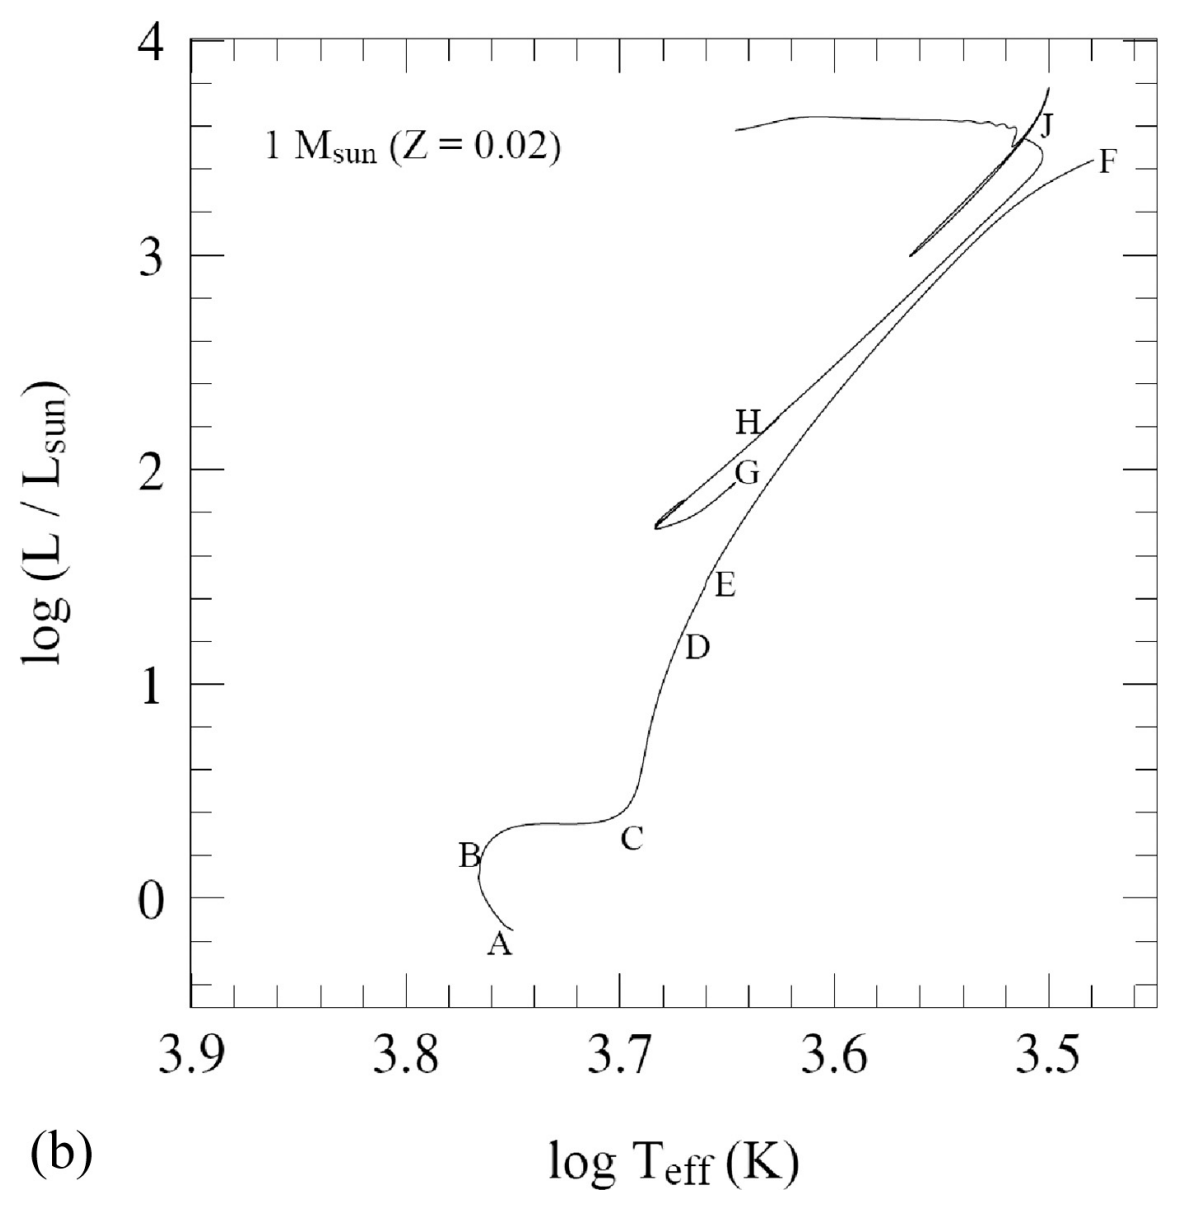

In [12]:
def get_R(logL, logT):
    L, T = 10**logL, 10**logT
    L *= L_sun.cgs.value
    return np.sqrt(L / (4 * np.pi * sigma_sb.cgs.value * T ** 4)) / R_sun.cgs.value

params = {"Start of RGB : ": [0.4, 3.7],
          "End of RGB   : ": [3.45, 3.48]}

for stage, param in params.items():
    print(stage, f"{get_R(*param):.2e} R_sun")

Start of RGB :  2.10e+00 R_sun
End of RGB   :  1.94e+02 R_sun


So at the start of the RGB phase, the a 1$M_\odot$ star has a radius of about **2.1 $R_\odot$** and at the end of the RGB phase it has expanded to roughly **194 $R_\odot$**

# Q 17.1

The luminosity of the helium flash is given to us as $10^{10}L_\odot$. Assuming this is constant, we can get the duration of the helium flash by dividing the total energy radiated by the luminosity. Assuming that the total energy radiated is 20% of the difference in gravitational potential energy of the core at the beginning and the end of the helium flash (the rest is carried away by neutrinos), we have:

Gravitational potential energy of a sphere of uniform density:
$$ U = -\frac{3}{5}\frac{G M^2}{R}$$

We assume that M, the mass of the core remains constant, so we rewrite this expression in terms of the core density:
$$ U = -\frac{3}{5} GM^2 \Big( \frac{3}{4\pi \rho} M \Big)^{-1/3}$$

Thus the total energy released as radiation is:
$$0.2 \times \Big[-\frac{3}{5}\Big(\frac{4\pi}{3}\Big)^{1/3}G (0.5 M_\odot)^{5/3}\Big] (\rho_{init}^{1/3} - \rho_{final}^{1/3})$$

Where the initial and final densities are $10^4 g/cm^3$ and $10^6 g/cm^3$ respectively. Plugging in numbers we get that the duration of the helium flash is roughly **76 days**

In [13]:
def U(dens):
    M = 0.5 * M_sun
    return (-3/5 * (4 * np.pi / 3 * dens) ** (1/3) * G * M ** (5/3)).cgs

((U(1e4*u.g/u.cm**3) - U(1e6*u.g/u.cm**3)) / (1e10 * L_sun * 0.2)).to(u.day)

<Quantity 75.82660466 d>